# **Dementia - Deep Learning Project**


__________________________

Import Datasets:
- CSV: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset
- Images: https://www.kaggle.com/datasets/ninadaithal/imagesoasis/data


Project Summary:

This project explores AI-driven dementia detection by combining deep learning and machine learning approaches. A MobileNetV2 model classifies medical images as "With Dementia" or "Non-Demented," achieving strong performance through robust training and testing techniques. Simultaneously, Decision Tree and Naive Bayes models analyze demographic and medical data to identify key predictors of dementia. By leveraging these complementary datasets and methodologies, the project underscores the potential of AI in enhancing early dementia screening and diagnosis.

_______________________________

# **Step 1: Data Loading**

We can start by importing all necessary libraries for this step

In [ ]:
import os
import kagglehub
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

And now let's get into it!

### A. CSV

Both datasets are from Kaggle, so first we need to add the paths for each dataset and download them using the Kagglehub dataset.

In [ ]:
path_csv = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")
print("Path to dataset CSV file:", path_csv)

100%|██████████| 268k/268k [00:00<00:00, 38.2MB/s]

Extracting files...
Path to dataset CSV file: /root/.cache/kagglehub/datasets/rabieelkharoua/alzheimers-disease-dataset/versions/1


Starting with our CSV dataset, let's list the contents within our dataset

In [ ]:
csv_folder_contents = os.listdir(path_csv)
print("Contents of csv dataset folder:\n")
for item in csv_folder_contents:
    print(item)
    if os.path.isdir(os.path.join(path_csv, item)):
        subitems = os.listdir(os.path_csv.join(path_csv, item))
        subitem_count = len(subitems)
        if subitem_count < 2:
            for subitem in subitems:
                print("   ",subitem)
                subitem_path = os.path.join(path_csv, item, subitem)
                if os.path.isdir(subitem_path):
                    sub_subitems_count = len(os.listdir(subitem_path))
                    print(f"       Number of sub-subitems: {sub_subitems_count}")
        else:
            print(f"Number of subitems: {subitem_count}")
    else:
        print("    None")

Contents of csv dataset folder:

alzheimers_disease_data.csv
    None


Okay, so it is only the one CSV, nothing else. Let's create a variable holding the path to it.

In [ ]:
csv_data_path = os.path.join(path_csv, 'alzheimers_disease_data.csv')
csv_data = pd.read_csv(csv_data_path)

And let's check it out

In [ ]:
csv_data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Great! Now let's load the images dataset.

### B. Images

Now we can do the same thing we did with the CSV and first add the paths for each dataset and download them using the Kagglehub dataset.

In [ ]:
path_images = kagglehub.dataset_download("ninadaithal/imagesoasis")
print("Path to dataset image files:", path_images)

100%|██████████| 1.23G/1.23G [00:13<00:00, 97.5MB/s]

Extracting files...


Path to dataset image files: /root/.cache/kagglehub/datasets/ninadaithal/imagesoasis/versions/1


Let's start by viewing the contents of this dataset folder

In [ ]:
images_folder_contents = os.listdir(path_images)
print("Contents of images dataset folder:\n")
for item in images_folder_contents:
    print(item)
    if os.path.isdir(os.path.join(path_images, item)):
        subitems = os.listdir(os.path.join(path_images, item))
        subitem_count = len(subitems)
        if subitem_count < 10:
            for subitem in subitems:
                print("   ",subitem)
                subitem_path = os.path.join(path_images, item, subitem)
                if os.path.isdir(subitem_path):
                    sub_subitems_count = len(os.listdir(subitem_path))
                    print(f"        Number of sub-subitems: {sub_subitems_count}")
        else:
            print(f"Number of subitems: {subitem_count}")
    else:
        print("    None")

Contents of images dataset folder:

Data
    Mild Dementia
        Number of sub-subitems: 5002
    Non Demented
        Number of sub-subitems: 67222
    Very mild Dementia
        Number of sub-subitems: 13725
    Moderate Dementia
        Number of sub-subitems: 488


There are 4 main subfolders, so let's name each of their paths, as well as the path of the folder they are all located in.

In [ ]:
images_data_path = os.path.join(path_images, 'Data')
vmild_images_path = os.path.join(images_data_path, 'Very mild Dementia')
mild_images_path = os.path.join(images_data_path, 'Mild Dementia')
mod_images_path = os.path.join(images_data_path, 'Moderate Dementia')
non_images_path = os.path.join(images_data_path, 'Non Demented')

They all contain .jpg images of MRI brain scans, so let's display a sample of the Moderate Dementia folder to exemplify the images.

We can access image data using the variable name we just created.

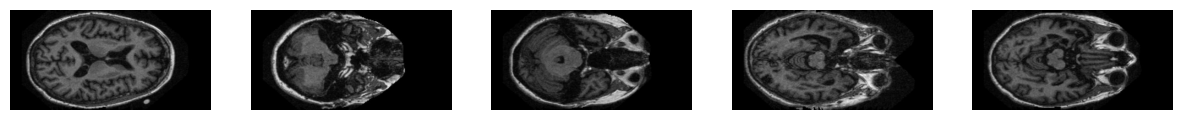

In [ ]:
example_image_files = [f for f in os.listdir(mod_images_path) if f.endswith('.jpg')][:5]
plt.figure(figsize=(15, 5))
for i, image_file in enumerate(example_image_files):
    image_path = os.path.join(mod_images_path, image_file)
    image = Image.open(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

# **Step 2: Data Cleaning & Preprocessing**

We will need to import some packages from the tensorflow and sklearn libraries for this section, along with shutil.

In [ ]:
import shutil
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

As we go through and clean our datasets, Let's be sure to show the effects of our actions after each step!

### A. CSV

We can begin to clean the CSV dataset by dropping irrelevant columns

In [ ]:
csv_data = csv_data.drop(columns=['PatientID', 'DoctorInCharge'], axis=1)
print(csv_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

Then we can encode categorical variables, such as Gender and Ethnicity


In [ ]:
label_enc = LabelEncoder()
csv_data['Gender'] = label_enc.fit_transform(csv_data['Gender'])
csv_data['Ethnicity'] = label_enc.fit_transform(csv_data['Ethnicity'])
csv_data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


And normalize numeric features, such as Age and BMI

In [ ]:
scaler = MinMaxScaler()
numeric_features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'MMSE']
csv_data[numeric_features] = scaler.fit_transform(csv_data[numeric_features])
csv_data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0.433333,0,0,2,0.316960,0,0.665183,0.633375,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,0.966667,0,0,0,0.473058,0,0.227170,0.762862,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,0.433333,0,3,1,0.111553,0,0.978276,0.785408,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,0.466667,1,0,1,0.752163,1,0.610751,0.843804,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,0.966667,0,0,0,0.228472,0,0.923204,0.631707,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


Before spliting the data into Training and Testing sets!

While we do this, let's keep in mind that our target variable is 'Diagnoses', we would like to use an 80/20 train/test split percentage, and we would like to use stratification.

By using stratification, we are making sure that our model is trained and evaluated on a representative sample of all diagnosis categories. This is crucial to avoid biased results, especially if a diagnosis category is under-represented in our data.

In [ ]:
X = csv_data.drop(columns=['Diagnosis'])
y = csv_data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Now let's print the shapes of the training and testing sets, to visualize the split.

In [ ]:
print("Training set size (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set size (X_test, y_test):", X_test.shape, y_test.shape)

Training set size (X_train, y_train): (1719, 32) (1719,)
Testing set size (X_test, y_test): (430, 32) (430,)


### B. Images

To begin preprocessing the images, let's create a new folder called "With Dementia" that holds all of the images from all 3 of the 4 sub-folders that represent at least some degree of dementia. We can name the path variable to this folder "with_images_path".

In [ ]:
with_images_path = os.path.join(images_data_path, 'With Dementia')
if not os.path.exists(with_images_path):
    os.makedirs(with_images_path)
def move_images_to_with_dementia(src_paths, dest_path):
    for src_path in src_paths:
        for filename in os.listdir(src_path):
            file_path = os.path.join(src_path, filename)
            if os.path.isfile(file_path):
                shutil.copy(file_path, dest_path)
move_images_to_with_dementia(
    [vmild_images_path, mild_images_path, mod_images_path],
    with_images_path
)
print(f"All images from 'Very mild Dementia', 'Mild Dementia', and 'Moderate Dementia' have been copied to '{with_images_path}'.")

All images from 'Very mild Dementia', 'Mild Dementia', and 'Moderate Dementia' have been copied to '/root/.cache/kagglehub/datasets/ninadaithal/imagesoasis/versions/1/Data/With Dementia'.


Let's go back and review the updated contents of the images dataset folder.

In [ ]:
images_folder_contents = os.listdir(path_images)
print("Contents of images dataset folder:\n")
for item in images_folder_contents:
    print(item)
    if os.path.isdir(os.path.join(path_images, item)):
        subitems = os.listdir(os.path.join(path_images, item))
        subitem_count = len(subitems)
        if subitem_count < 10:
            for subitem in subitems:
                print("   ",subitem)
                subitem_path = os.path.join(path_images, item, subitem)
                if os.path.isdir(subitem_path):
                    sub_subitems_count = len(os.listdir(subitem_path))
                    print(f"        Number of sub-subitems: {sub_subitems_count}")
        else:
            print(f"Number of subitems: {subitem_count}")
    else:
        print("    None")

Contents of images dataset folder:

Data
    Mild Dementia
        Number of sub-subitems: 5002
    Non Demented
        Number of sub-subitems: 67222
    Very mild Dementia
        Number of sub-subitems: 13725
    With Dementia
        Number of sub-subitems: 19215
    Moderate Dementia
        Number of sub-subitems: 488


The "With Dementia" folder should have images equal to 13725 + 5002 + 488, or 19215. So that is correct!

Now let's create a function that labels and copies files from the source path to the destination path. The labels will work by adding a prefix to the filename.

In [ ]:
def label_and_copy_files(source_path, destination_path, label):
    os.makedirs(destination_path, exist_ok=True)
    for idx, filename in enumerate(os.listdir(source_path)):
        file_path = os.path.join(source_path, filename)
        if os.path.isfile(file_path):
            file_ext = os.path.splitext(filename)[1]
            new_filename = f"{label}_{idx}{file_ext}"
            shutil.copy(file_path, os.path.join(destination_path, new_filename))

To use this function with our code, we can create a new destination folder path to hold all images once they are labeled. We can go ahead and follow the same format as with the target variable "Diagnosis" on the patient data CSV - a "0" label to represent no dementia detected and a "1" label to represent any level of dementia detected.

In [ ]:
all_labeled_images_path = os.path.join(images_data_path, 'All Labeled Images')
label_and_copy_files(non_images_path, all_labeled_images_path, "0")
label_and_copy_files(with_images_path, all_labeled_images_path, "1")
print(f"All labeled images have been combined into: {all_labeled_images_path}")

All labeled images have been combined into: /root/.cache/kagglehub/datasets/ninadaithal/imagesoasis/versions/1/Data/All Labeled Images


Let's now take another look at the updated contents of the images dataset folder.

In [ ]:
images_folder_contents = os.listdir(path_images)
print("Contents of images dataset folder:\n")
for item in images_folder_contents:
    print(item)
    if os.path.isdir(os.path.join(path_images, item)):
        subitems = os.listdir(os.path.join(path_images, item))
        subitem_count = len(subitems)
        if subitem_count < 10:
            for subitem in subitems:
                print("   ",subitem)
                subitem_path = os.path.join(path_images, item, subitem)
                if os.path.isdir(subitem_path):
                    sub_subitems_count = len(os.listdir(subitem_path))
                    print(f"        Number of sub-subitems: {sub_subitems_count}")
        else:
            print(f"Number of subitems: {subitem_count}")
    else:
        print("    None")

Contents of images dataset folder:

Data
    Mild Dementia
        Number of sub-subitems: 5002
    Non Demented
        Number of sub-subitems: 67222
    Very mild Dementia
        Number of sub-subitems: 13725
    With Dementia
        Number of sub-subitems: 19215
    All Labeled Images
        Number of sub-subitems: 86437
    Moderate Dementia
        Number of sub-subitems: 488


The total number of images within the "All Labeled Images" folder should be 67222 + 19215, or 86437. Therefore, this is correct!

We should also double check the labels, to ensure that the 67222 images without dementia are labeled "0" and the 19215 images with some degree of dementia are labeled "1".

In [ ]:
def count_labels_in_folder(path):
    counts = {"0": 0, "1": 0}
    for filename in os.listdir(path):
        if filename.startswith("0_"):
            counts["0"] += 1
        elif filename.startswith("1_"):
            counts["1"] += 1
    return counts
label_counts = count_labels_in_folder(all_labeled_images_path)
print(f"Files labeled as '0': {label_counts['0']}")
print(f"Files labeled as '1': {label_counts['1']}")

Files labeled as '0': 67222
Files labeled as '1': 19215


Great, this is also correct!

Now we can proceed with preprocessing the images.

Let's split the dataset into training, validation, and test sets. The training and test sets will first be created using an 80/20 split, respectively. Then, the training set will be split again into another 80/20 split, this time representing the training/validation sets respectively.

In [ ]:
def split_dataset(all_images_path, test_size=0.2, val_size=0.2):
    filepaths = []
    labels = []
    for filename in os.listdir(all_images_path):
        if filename.startswith("0_"):
            labels.append(0)
        elif filename.startswith("1_"):
            labels.append(1)
        else:
            continue
        filepaths.append(os.path.join(all_images_path, filename))
    train_files, test_files, train_labels, test_labels = train_test_split(
        filepaths, labels, test_size=test_size, stratify=labels, random_state=42
    )
    train_files, val_files, train_labels, val_labels = train_test_split(
        train_files, train_labels, test_size=val_size / (1 - test_size), stratify=train_labels, random_state=42
    )
    return train_files, val_files, test_files, train_labels, val_labels, test_labels
train_files, val_files, test_files, train_labels, val_labels, test_labels = split_dataset(all_labeled_images_path)

Then we can create variables for our model parameters! Keep in mind that the input size for the model we will be using is 224 x 224.

In [ ]:
batch_size = 32
image_size = (224, 224)
epochs = 10
learning_rate = 0.001

Now we can create Image Data Generators using these parameters, including a training generator, validation generator, and testing generator.

Some additional preprocessing we will do in this function include creating pandas DataFrames for each set and converting all labels to string format. For the training set, we will complete data augmentation such as rescaling, including a flip, rotation, and zoom.

In [ ]:
def create_generators(train_files, val_files, test_files, train_labels, val_labels, test_labels, image_size, batch_size):
    train_df = pd.DataFrame({"filename": train_files, "class": train_labels})
    val_df = pd.DataFrame({"filename": val_files, "class": val_labels})
    test_df = pd.DataFrame({"filename": test_files, "class": test_labels})
    train_df['class'] = train_df['class'].astype(str)
    val_df['class'] = val_df['class'].astype(str)
    test_df['class'] = test_df['class'].astype(str)
    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        horizontal_flip=True,
        rotation_range=20,
        zoom_range=0.2
    )
    val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col="filename",
        y_col="class",
        target_size=image_size,
        batch_size=batch_size,
        class_mode="binary"
    )
    val_generator = val_test_datagen.flow_from_dataframe(
        dataframe=val_df,
        x_col="filename",
        y_col="class",
        target_size=image_size,
        batch_size=batch_size,
        class_mode="binary"
    )
    test_generator = val_test_datagen.flow_from_dataframe(
        dataframe=test_df,
        x_col="filename",
        y_col="class",
        target_size=image_size,
        batch_size=batch_size,
        class_mode="binary",
        shuffle=False
    )
    return train_generator, val_generator, test_generator
train_generator, val_generator, test_generator = create_generators(
    train_files, val_files, test_files, train_labels, val_labels, test_labels, image_size, batch_size
)

Found 51861 validated image filenames belonging to 2 classes.
Found 17288 validated image filenames belonging to 2 classes.
Found 17288 validated image filenames belonging to 2 classes.


Wonderful, our images have been appropriately split! Now we can proceed to building our models.

# **Step 3: Model Building**

Here, we will once again use several packages from the sklearn and tensorflow libraries.

In [ ]:
from tensorflow.keras.models import Model
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

### A. CSV

We will be applying our CSV-based patient data to two machine learning models:
- Decision Tree, and
- Naïve Bayes

Let's first create a Decision Tree model using the csv data.

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

And then we can do the same to create a Naïve Bayes model.

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### B. Images

For the images, we are going to be applying them to a MobileNetV2 deep learning model using the parameters we established in the last step.

As we load a pre-trained model, we can freeze the base model for transfer learning and then add custom layers.

Also, please note that we will be using binary classification here, since our labels are 0 and 1.

In [ ]:
def create_model(input_shape, learning_rate):
    base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=input_shape)
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation="relu")(x)
    output = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss="binary_crossentropy", metrics=["accuracy"])
    return model
model = create_model(input_shape=(image_size[0], image_size[1], 3), learning_rate=learning_rate)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Then we can train this model

In [ ]:
def train_model(model, train_generator, val_generator, epochs):
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs,
        steps_per_epoch=train_generator.samples // batch_size,
        validation_steps=val_generator.samples // batch_size,
        verbose=1
    )
    return history
print("Training the model...")
history = train_model(model, train_generator, val_generator, epochs)

Training the model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1620/1620 ━━━━━━━━━━━━━━━━━━━━ 654s 395ms/step - accuracy: 0.7967 - loss: 0.4199 - val_accuracy: 0.8222 - val_loss: 0.3906
Epoch 2/10
   1/1620 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.7500 - loss: 0.5185

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1620/1620 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7500 - loss: 0.5185 - val_accuracy: 1.0000 - val_loss: 0.1301
Epoch 3/10
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 631s 388ms/step - accuracy: 0.8364 - loss: 0.3389 - val_accuracy: 0.8310 - val_loss: 0.3718
Epoch 4/10
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - accuracy: 0.7500 - loss: 0.4526 - val_accuracy: 0.8750 - val_loss: 0.3376
Epoch 5/10
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 634s 390ms/step - accuracy: 0.8551 - loss: 0.3084 - val_accuracy: 0.8581 - val_loss: 0.3087
Epoch 6/10
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8750 - loss: 0.3787 - val_accuracy: 0.6250 - val_loss: 0.4963
Epoch 7/10
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 676s 394ms/step - accuracy: 0.8680 - loss: 0.2858 - val_accuracy: 0.8775 - val_loss: 0.2711
Epoch 8/10
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.8750 - loss: 0.2100 - val_accuracy: 0.6250 - val_loss: 0.6472
Epoch 9/10
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 677s 390ms/step - accuracy: 0.8773 - loss: 0

And then fine-tune the model, being sure to unfreeze the base model before doing so.

In [ ]:
def fine_tune_model(model, base_model, learning_rate):
    base_model.trainable = True
    model.compile(optimizer=Adam(learning_rate=learning_rate / 10), loss="binary_crossentropy", metrics=["accuracy"])
    return model
print("Fine-tuning the model...")
model = fine_tune_model(model, model.layers[0], learning_rate)
history_fine_tune = train_model(model, train_generator, val_generator, epochs // 2)

Fine-tuning the model...
Epoch 1/5
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 646s 392ms/step - accuracy: 0.8952 - loss: 0.2357 - val_accuracy: 0.8884 - val_loss: 0.2556
Epoch 2/5
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8750 - loss: 0.2416 - val_accuracy: 0.6250 - val_loss: 0.8030
Epoch 3/5
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 640s 393ms/step - accuracy: 0.9016 - loss: 0.2254 - val_accuracy: 0.8904 - val_loss: 0.2551
Epoch 4/5
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.9062 - loss: 0.2555 - val_accuracy: 0.8750 - val_loss: 0.1207
Epoch 5/5
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 679s 391ms/step - accuracy: 0.9045 - loss: 0.2183 - val_accuracy: 0.8877 - val_loss: 0.2629


Now save it!

In [ ]:
model.save("mobilenetv2_classifier.h5")

And all of our models have been built!

# **Step 4: Model Testing and Evaluation**

As always, let's start by importing the libraries we will need for this step.

This time, we will need sklearn and seaborn.

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

### A. CSV

Let's create predictions of our test set, first using the Decision Tree model and then using the Naïve Bayes model.

In [ ]:
dt_preds = dt.predict(X_test)
nb_preds = nb.predict(X_test)

Let's print some examples of the model testing, for both models.

In [ ]:
print("Sample Predictions from the Decision Tree model:")
for i in range(10):
    print(f"Sample {i + 1}: Predicted: {dt_preds[i]}, Actual: {y_test.iloc[i]}")

print("\nSample Predictions from the Naïve Bayes model:")
for i in range(10):
    print(f"Sample {i + 1}: Predicted: {nb_preds[i]}, Actual: {y_test.iloc[i]}")

Sample Predictions from the Decision Tree model:
Sample 1: Predicted: 1, Actual: 1
Sample 2: Predicted: 0, Actual: 1
Sample 3: Predicted: 1, Actual: 1
Sample 4: Predicted: 1, Actual: 1
Sample 5: Predicted: 1, Actual: 1
Sample 6: Predicted: 0, Actual: 0
Sample 7: Predicted: 1, Actual: 1
Sample 8: Predicted: 0, Actual: 0
Sample 9: Predicted: 0, Actual: 0
Sample 10: Predicted: 1, Actual: 1

Sample Predictions from the Naïve Bayes model:
Sample 1: Predicted: 1, Actual: 1
Sample 2: Predicted: 0, Actual: 1
Sample 3: Predicted: 1, Actual: 1
Sample 4: Predicted: 0, Actual: 1
Sample 5: Predicted: 1, Actual: 1
Sample 6: Predicted: 0, Actual: 0
Sample 7: Predicted: 1, Actual: 1
Sample 8: Predicted: 0, Actual: 0
Sample 9: Predicted: 1, Actual: 0
Sample 10: Predicted: 1, Actual: 1


Then we can create classification reports on each model's performance.

In [ ]:
print("Decision Tree Performance:\n", classification_report(y_test, dt_preds))

Decision Tree Performance:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       278
           1       0.85      0.88      0.86       152

    accuracy                           0.90       430
   macro avg       0.89      0.89      0.89       430
weighted avg       0.90      0.90      0.90       430



In [ ]:
print("Naïve Bayes Performance:\n", classification_report(y_test, nb_preds))

Naïve Bayes Performance:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       278
           1       0.67      0.70      0.68       152

    accuracy                           0.77       430
   macro avg       0.75      0.76      0.75       430
weighted avg       0.77      0.77      0.77       430



Let's take a closer look at model accuracy specifically.

In [ ]:
dt_accuracy = accuracy_score(y_test, dt_preds)
nb_accuracy = accuracy_score(y_test, nb_preds)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Naïve Bayes Accuracy: {nb_accuracy:.2f}")

Decision Tree Accuracy: 0.90
Naïve Bayes Accuracy: 0.77


Great! Now we can proceed to evaluating the images model.

### B. Images

Let's start by evaluating our MobileNetV2 model on our test set.

In [ ]:
print("Evaluating the model on the test set...")
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

Evaluating the model on the test set...
  2/540 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - accuracy: 0.9062 - loss: 0.2512  

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


540/540 ━━━━━━━━━━━━━━━━━━━━ 35s 64ms/step - accuracy: 0.8932 - loss: 0.2513
Test Accuracy: 0.8887


Now let's take a look at several visual representations of the images model.

We can start by printing some examples of the predictions/testing compared to the true labels, with modified labels for simplicity.

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


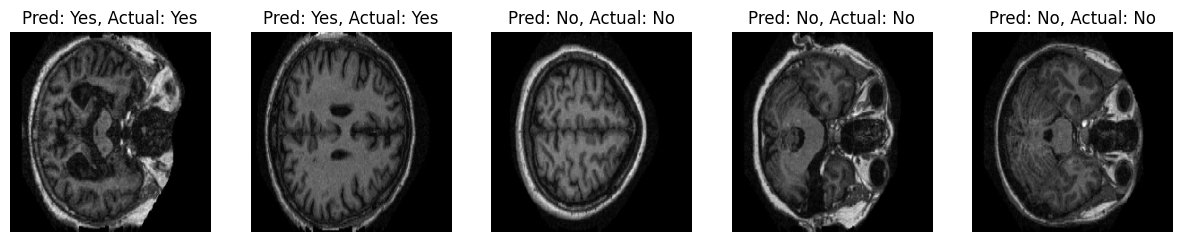

In [ ]:
images, labels = next(test_generator)
predictions = model.predict(images)
predicted_labels = (predictions > 0.5).astype(int)
num_examples_to_display = 5
plt.figure(figsize=(15, 5))
for i in range(num_examples_to_display):
    plt.subplot(1, num_examples_to_display, i + 1)
    plt.imshow(images[i])
    predicted_label_str = "Yes" if predicted_labels[i][0] == 1 else "No"
    actual_label_str = "Yes" if labels[i] == 1 else "No"
    plt.title(f"Pred: {predicted_label_str}, Actual: {actual_label_str}")
    plt.axis('off')
plt.show()

Let's also generate the classification report for this model

In [ ]:
y_pred = model.predict(test_generator)
y_pred_binary = (y_pred > 0.5).astype(int)
report = classification_report(test_generator.classes, y_pred_binary, target_names=['Non Demented', 'With Dementia'])
print(report)

541/541 ━━━━━━━━━━━━━━━━━━━━ 34s 59ms/step
               precision    recall  f1-score   support

 Non Demented       0.91      0.95      0.93     13445
With Dementia       0.80      0.66      0.72      3843

     accuracy                           0.89     17288
    macro avg       0.86      0.81      0.83     17288
 weighted avg       0.88      0.89      0.88     17288



Now let's take a look at a confusion matrix of how the model evaluated the test set we provided it with, predicted labels vs actual labels.

For this, we can use seaborn.

541/541 ━━━━━━━━━━━━━━━━━━━━ 28s 53ms/step


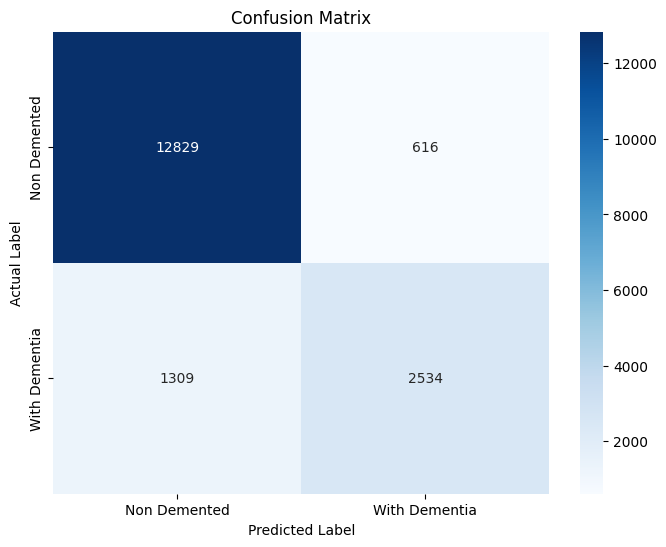

In [ ]:
y_pred = model.predict(test_generator)
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(test_generator.classes, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non Demented', 'With Dementia'],
            yticklabels=['Non Demented', 'With Dementia'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

We can also normalize this confusion matrix to get proportions, and use that to represent our model performance instead.

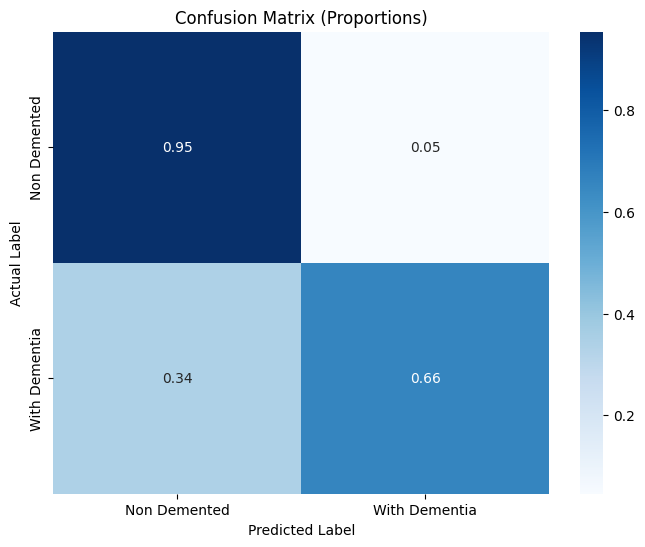

In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=['Non Demented', 'With Dementia'],
            yticklabels=['Non Demented', 'With Dementia'])
plt.title('Confusion Matrix (Proportions)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Then we can plot the training and validation accuracy and loss values across epochs during the model's initial training.

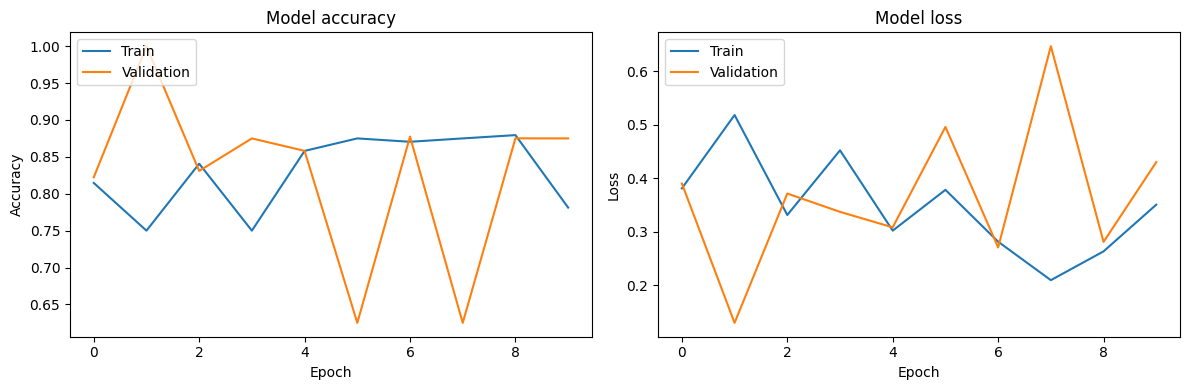

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Progressively, our accuracy trended up and our loss trended down.

Finally, let's calculate and plot the Receiver Operating Characteristic (ROC) Curve.

Here, the closer the Area Under the Curve (AUC) is to 1, the closer the model is the being considered a perfect classifier.

The closer the AUC is to 0.5, the closer the model is to being considered no better than random guessing.

541/541 ━━━━━━━━━━━━━━━━━━━━ 30s 55ms/step


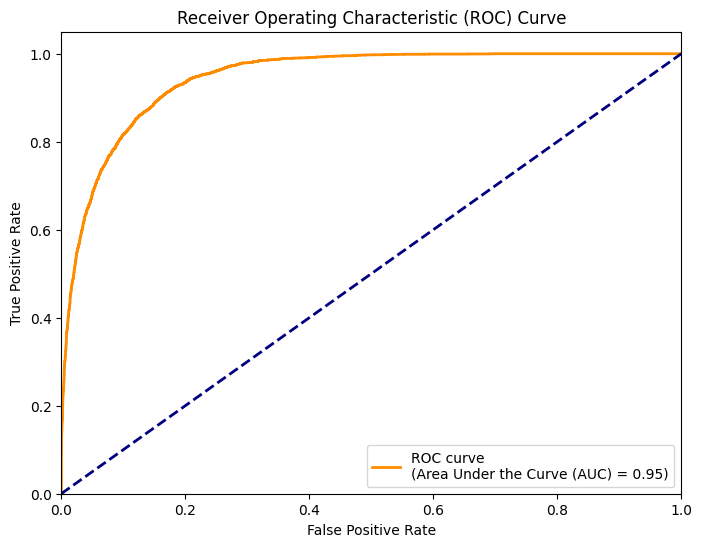

In [ ]:
y_pred_probs = model.predict(test_generator)[:, 0]
fpr, tpr, thresholds = roc_curve(test_generator.classes, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve \n(Area Under the Curve (AUC) = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Our AUC is 0.95!

This shows it is an extremely strong classifier.

This concludes the code portion of our project.